In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import scipy as ss
import scipy.stats
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.decomposition import PCA

import visualization_functions as vis
col1 = "#f93c3c"
col2 = "#009a7f"
col3 = "#9fa8ab"
col5 = "#00490c"
col4 = "#f4d895"


colors = [col1, col2, col3, col4, col5]


counts_file = "/Users/annasintsova/git_repos/proteus/"\
            "data/counts/stranded/2018-04-23_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/proteus/"\
            "data/counts/stranded/2018-04-23_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/proteus/data/study_design.csv"

figures_folder = "/Users/annasintsova/git_repos/proteus/figures/"


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]

wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Swarm Front"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Swarm Front"

thirty = "30 min"
zero = "0 min"

samples = {"Case5":"{}|{}".format(wt_L, thirty),
           "Case6":"{}|{}".format(wt_L, zero),
            "Case7":"{}|{}|{}".format(wt, bh_mut, thirty), 
          "Case8":"{}|{}|{}".format(mut, bh_mut, thirty),
          "Case9": "{}|{}".format(mut_L, zero),
          "Case10": "{}|{}".format(mut_L, thirty),
          "Case11": "{}|{}|{}".format(mut, bh_mut, zero),
           "Case12":"{}|{}|{}".format(wt, bh_mut, zero),
          "Case13": "{}|{}|{}".format(wt, bh_wt,zero ),
           "Case14":"{}|{}|{}".format(wt, bh_wt, thirty)}


In [2]:
meta = meta[meta["lane.ID"]!="L1"]
rpkms = rpkms[meta.index]
rpkms_norm =  rpkms.apply(vis.invnorm)
meta["samples"] = [samples[i] for i in meta["group.ID"]]
meta["time.point"] = meta["time.point"].str.replace("0''", "0 min")
meta["time.point"] = meta["time.point"].str.replace("4'", "4 hrs")
meta['position'] = meta['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})


In [3]:
def replicate_control(rpkms_norm, meta, condition, case):
    samples = meta[meta[condition]==case].index  
    combs = itertools.combinations(samples,2)        
    corr = [rpkms_norm[t[0]].corr(rpkms_norm[t[1]], method='pearson')*100 for t in combs]
    df = pd.DataFrame({"sample":[case]*len(corr), "pearson":corr})
    return df

def correlation_by_condition(rpkms_norm,  meta, condition, groups):    
    corr_df = pd.concat([replicate_control(rpkms_norm, meta, condition, case) for case in groups]) 
    return corr_df


In [4]:
replicates_group = ["Case13", "Case14", "Case7", "Case12", "Case8", "Case11"]
replicates_corr = correlation_by_condition(rpkms_norm, meta, "group.ID", replicates_group)
replicates_corr["sample"] = replicates_corr['sample'].map(samples)

position_group = ["{}|{}".format(wt,bh_wt),
                  "{}|{}".format(wt, bh_mut), 
                  "{}|{}".format(mut, bh_mut)]


position_corr = correlation_by_condition(rpkms_norm, meta, "position", position_group)

corr_df = pd.concat([replicates_corr, position_corr])
corr_df


#ax = sns.boxplot(x = "sample", y = "pearson", data = dl_c, palette="Set2", width=.5, showfliers=False)
#ax.set_ylim(85, 100)


,pearson,sample
0,96.942286,WT|Behind Swarm Front|0 min
1,98.046705,WT|Behind Swarm Front|0 min
2,97.556249,WT|Behind Swarm Front|0 min
0,97.595681,WT|Behind Swarm Front|30 min
1,97.881784,WT|Behind Swarm Front|30 min
2,98.985154,WT|Behind Swarm Front|30 min
0,98.063965,WT|Behind Dienes Line|30 min
1,97.862264,WT|Behind Dienes Line|30 min
2,98.885502,WT|Behind Dienes Line|30 min
0,97.273111,WT|Behind Dienes Line|0 min


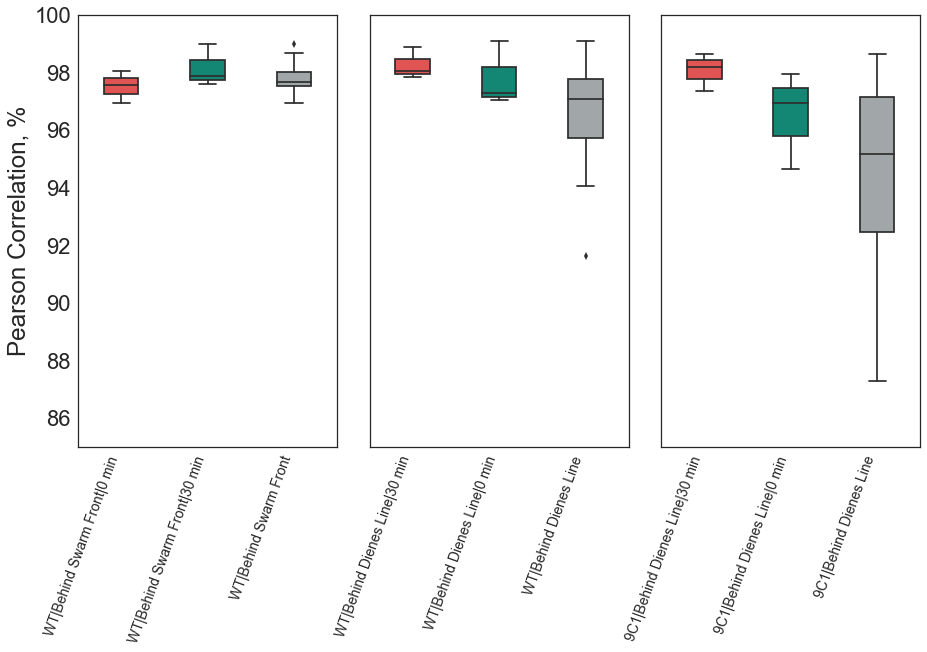

In [5]:
fig = plt.figure(figsize=(9,5))

sns.set(font_scale = 2.2)
sns.set_style("white")

ax1 = fig.add_axes([0.1, 0.5, 0.4, 1.2],
                    xticklabels=[], ylim=(85, 100))
samples1 = [samples["Case13"], samples["Case14"], "{}|{}".format(wt,bh_wt)]
df1 = corr_df[corr_df["sample"].isin(samples1)]
sns.boxplot(x = "sample", y = "pearson", palette=[col1, col2, col3],data = df1,width=0.4)
plt.ylabel("Pearson Correlation, %")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70, fontsize = 14, ha="right")
ax1.set_xlabel("")



ax2 = fig.add_axes([0.55, 0.5, 0.4, 1.2],
                    xticklabels=[], ylim=(85, 100))
samples2 = [samples["Case12"], samples["Case7"], "{}|{}".format(wt,bh_mut)]
df2 = corr_df[corr_df["sample"].isin(samples2)]
sns.boxplot(x = "sample", y = "pearson",palette=[col1,col2, col3], data = df2, width=0.4)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70, fontsize = 14, ha="right")
ax2.set_yticklabels("")
ax2.set_ylabel("")
ax2.set_xlabel("")

ax3 = fig.add_axes([1.0, 0.5, 0.4, 1.2],
                    xticklabels=[], ylim=(85, 100))
samples3 = [samples["Case11"], samples["Case8"], "{}|{}".format(mut,bh_mut)]
df3 = corr_df[corr_df["sample"].isin(samples3)]
sns.boxplot(x = "sample", y = "pearson",palette=[col1,col2, col3], data = df3, width=0.4)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=70, fontsize = 14, ha="right")
ax3.set_yticklabels("")
ax3.set_ylabel("")
ax3.set_xlabel("")

#fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_figure_3c.png"), dpi=300, bbox_inches="tight")

In [6]:
bh_line_samples = [samples["Case13"], samples["Case14"],
                   samples["Case12"], samples["Case7"],
                    samples["Case11"], samples["Case8"]]
bh_line_meta = meta[meta["samples"].isin(bh_line_samples)]
bh_line_rpkms = rpkms_norm[meta.index]

In [7]:
pDf, pc1_var, pc2_var = vis.findTwoComponents(bh_line_rpkms, bh_line_meta)
pDf

,PC1,PC2,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76073,-10.764351,1.194189,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT|Behind Dienes Line|30 min
76074,-6.600372,-0.069190,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT|Behind Dienes Line|30 min
76075,-7.291648,-2.809933,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT|Behind Dienes Line|30 min
76076,-7.681354,5.345505,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1|Behind Dienes Line|30 min
76077,-7.335255,5.513905,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,6.6,9C1|Behind Dienes Line|30 min
76078,-7.275468,1.954312,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.7,9C1|Behind Dienes Line|30 min
76085,16.312717,-9.137864,L2,Case11,0 min,Mix,9C1|Behind Dienes Line,7.5,9C1|Behind Dienes Line|0 min
76086,10.532696,-5.404575,L2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.4,9C1|Behind Dienes Line|0 min
76087,4.321188,-1.243632,L2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.7,9C1|Behind Dienes Line|0 min
76088,9.468484,-8.437950,L2,Case12,0 min,Mix,WT|Behind Dienes Line,7.3,WT|Behind Dienes Line|0 min


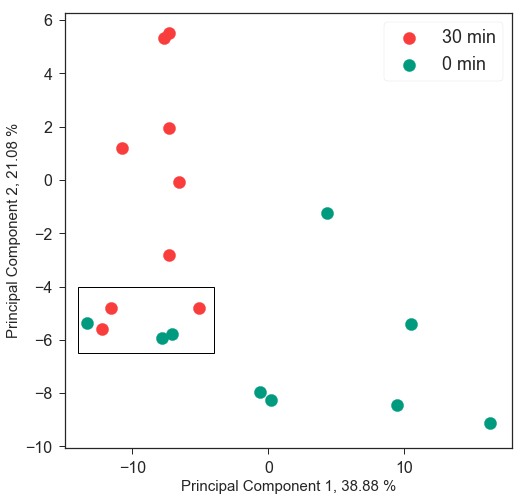

In [8]:
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time.point",c=colors, title = "", filename = '', el=False )
rect = patches.Rectangle((-14,-6.5),10,2.5,linewidth=1,edgecolor='k',facecolor='none')
ax = fig.gca()
ax.add_patch(rect)
#fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_3d.png"), dpi=300)

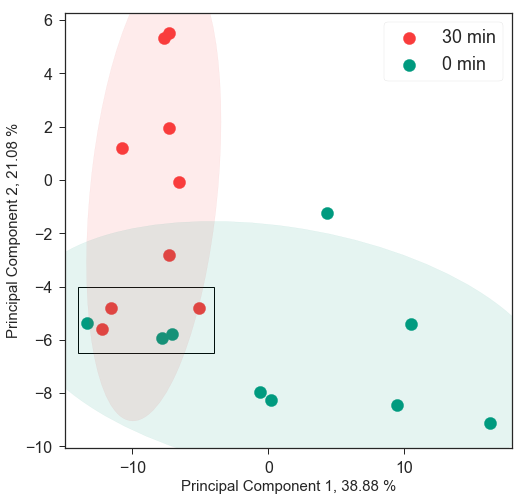

In [11]:
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time.point",c=colors, title = "", filename = '', el=True )
rect = patches.Rectangle((-14,-6.5),10,2.5,linewidth=1,edgecolor='k',facecolor='none')
ax = fig.gca()
ax.add_patch(rect)
fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_3d_v2.png"), dpi=300)

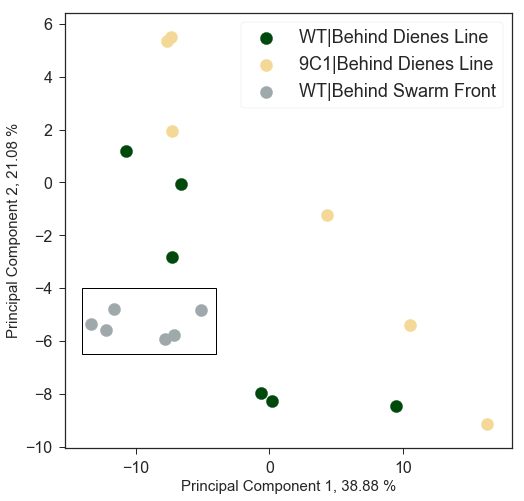

In [12]:
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", c=[col5,col4,col3], title = "", filename = '', el=False )
rect = patches.Rectangle((-14,-6.5),10,2.5,linewidth=1,edgecolor='k',facecolor='none')
ax = fig.gca()
ax.add_patch(rect)
#fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_3e.png"), dpi=300)

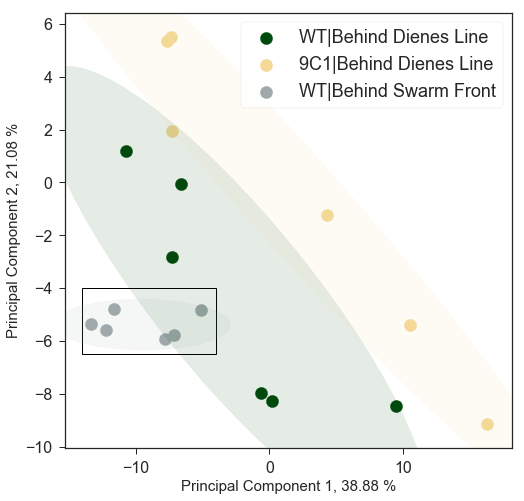

In [13]:
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", c=[col5,col4,col3], title = "", filename = '', el=True )
rect = patches.Rectangle((-14,-6.5),10,2.5,linewidth=1,edgecolor='k',facecolor='none')
ax = fig.gca()
ax.add_patch(rect)
fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_3e_v2.png"), dpi=300)

In [10]:
mk_file = "/Users/annasintsova/git_repos/proteus/analysis/mutant_killing/rpkm/kan_rpkms.csv"
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk.index = [i.strip("S") for i in mk.index]
mk = mk.join(bh_line_meta, how = "inner")
#mk["samples"] = [samples[i] for i in mk["group.ID"]]
mk

,Kan RPKM,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76073,0.99,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT|Behind Dienes Line|30 min
76074,3.24,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT|Behind Dienes Line|30 min
76075,1.04,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT|Behind Dienes Line|30 min
76076,377.11,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1|Behind Dienes Line|30 min
76077,368.43,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,6.6,9C1|Behind Dienes Line|30 min
76078,366.00,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.7,9C1|Behind Dienes Line|30 min
76085,179.49,L2,Case11,0 min,Mix,9C1|Behind Dienes Line,7.5,9C1|Behind Dienes Line|0 min
76086,196.33,L2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.4,9C1|Behind Dienes Line|0 min
76087,259.81,L2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.7,9C1|Behind Dienes Line|0 min
76088,1.07,L2,Case12,0 min,Mix,WT|Behind Dienes Line,7.3,WT|Behind Dienes Line|0 min


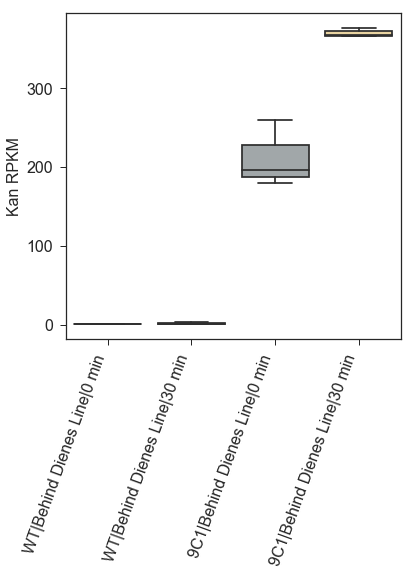

In [11]:
fig = plt.figure(figsize = (6,6))
order = [samples["Case12"], samples["Case7"], samples["Case11"], samples["Case8"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=colors, order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
#fig.savefig(os.path.join(figures_folder, "proteus_rnaseq_figure_3b.png"), dpi=300, bbox_inches="tight")